In [ ]:
from tensorflow import keras
from keras.utils.image_utils import load_img 
from keras.utils.image_utils import img_to_array
from keras.applications.vgg16 import preprocess_input 

In [ ]:
from torchvision.datasets import INaturalist

In [ ]:
INaturalist (root= "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals", 
             version = '2021_valid',
             target_type= ['full'] ,
             download = True)

  0%|          | 0/8931661582 [00:00<?, ?it/s]

Extracting /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid.tgz to /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals
Dataset version '2021_valid' has been downloaded and prepared for use


Dataset INaturalist
    Number of datapoints: 100000
    Root location: /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid

In [ ]:
#https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [ ]:
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

In [ ]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
img_path = "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/"

In [ ]:
os.chdir(img_path)

In [ ]:
os.listdir (img_path)

['00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata',
 '04827_Animalia_Chordata_Mammalia_Rodentia_Sciuridae_Geosciurus_inauris',
 '09296_Plantae_Tracheophyta_Magnoliopsida_Rosales_Elaeagnaceae_Elaeagnus_angustifolia',
 '08333_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Rubiaceae_Coprosma_rotundifolia',
 '01569_Animalia_Arthropoda_Insecta_Lepidoptera_Noctuidae_Agrotis_segetum',
 '08272_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Gomphocarpus_cancellatus',
 '00403_Animalia_Arthropoda_Insecta_Coleoptera_Scarabaeidae_Trypoxylus_dichotomus',
 '01484_Animalia_Arthropoda_Insecta_Lepidoptera_Lycaenidae_Icaricia_acmon',
 '01219_Animalia_Arthropoda_Insecta_Lepidoptera_Geometridae_Gastrina_cristaria',
 '06343_Plantae_Tracheophyta_Liliopsida_Poales_Poaceae_Briza_minor',
 '08999_Plantae_Tracheophyta_Magnoliopsida_Myrtales_Lythraceae_Lagerstroemia_indica',
 '07080_Plantae_Tracheophyta_Magnoliopsida_Asterales_Asteraceae_Youngia_japonica',
 '04636_Animal

In [ ]:
os.listdir (img_path) [0]

'00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata'

In [ ]:
dir_of_interest = [i.split("_")[1] for i in os.listdir (img_path) ]

In [ ]:
list (set (dir_of_interest))

['Fungi', 'Animalia', 'Plantae']

In [ ]:
dir_of_interest_animals = [i for i in os.listdir (img_path) if "Animalia" in i]

In [ ]:
dir_of_interest_animals

['00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata',
 '04827_Animalia_Chordata_Mammalia_Rodentia_Sciuridae_Geosciurus_inauris',
 '01569_Animalia_Arthropoda_Insecta_Lepidoptera_Noctuidae_Agrotis_segetum',
 '00403_Animalia_Arthropoda_Insecta_Coleoptera_Scarabaeidae_Trypoxylus_dichotomus',
 '01484_Animalia_Arthropoda_Insecta_Lepidoptera_Lycaenidae_Icaricia_acmon',
 '01219_Animalia_Arthropoda_Insecta_Lepidoptera_Geometridae_Gastrina_cristaria',
 '04636_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Raphicerus_campestris',
 '01227_Animalia_Arthropoda_Insecta_Lepidoptera_Geometridae_Heterophleps_triguttaria',
 '03472_Animalia_Chordata_Aves_Charadriiformes_Scolopacidae_Gallinago_gallinago',
 '02177_Animalia_Arthropoda_Insecta_Lepidoptera_Sphingidae_Ceratomia_catalpae',
 '00096_Animalia_Arthropoda_Arachnida_Araneae_Salticidae_Platycryptus_undatus',
 '00657_Animalia_Arthropoda_Insecta_Hemiptera_Reduviidae_Zelus_luridus',
 '04672_Animalia_Chordata_Mammalia_Carnivo

In [ ]:
flowers = []
for d in dir_of_interest_animals:
      # this list holds all the image filename
    img_path = "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/" + d   
    # creates a ScandirIterator aliased as files
    with os.scandir(img_path) as files:
      # loops through each file in the directory
        for file in files:
             if file.name.endswith('.jpg'):
              # adds only the image files to the flowers list
                flowers.append([img_path,file.name])

In [ ]:
flowers  [0:3]

[['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata',
  '2abd674a-87df-4d1b-b077-a176ae2ada38.jpg'],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata',
  '2e1c89ee-ed26-42b3-af7e-e08bd99cb870.jpg'],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/00328_Animalia_Arthropoda_Insecta_Coleoptera_Coccinellidae_Hippodamia_variegata',
  '85107516-24d5-42b4-bd5c-abc5a93ddeee.jpg']]

In [ ]:
len (flowers)

53880

In [ ]:
import random 
flowers_r = random.sample(flowers, 500)

In [ ]:
len (flowers_r)

500

In [ ]:
def blur_image (image_name):
  # Importing Image class from PIL module
  import PIL
  from PIL import Image

  # Opens a image in RGB mode
  im = Image.open(r"{}".format(image_name[0]+"/"+image_name[1]))

  # Blurring the image
  im1 = im.filter(PIL.ImageFilter.BoxBlur(10))
  f_path = "gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals/"

  im1.save (f_path  +"blur_{}".format(image_name[1]))

In [ ]:
blur_images = False # already have some images blurred 
if blur_images  :
  i = 0 
  for im in flowers_r : 
      try :
        i = i + 1
        print (i)
        blur_image (im)
      except :
        continue   

In [ ]:
dir_blur = os.listdir("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals")
dir_blur = list (set ([i for i in dir_blur if "blur" in i]))


In [ ]:
dir_blur [0:3]

['blur_0cd9874d-f0c9-4f77-8d19-a69648dd7385.jpg',
 'blur_c4ed013b-7b6a-4894-b17d-0522773e78cd.jpg',
 'blur_3567e3f8-731c-4c68-96c3-1beebda63910.jpg']

In [ ]:
len (dir_blur)

500

In [ ]:
for i in range (1):
  with os.scandir("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals/") as files:
    
    # loops through each file in the directory
      for file in files:
            if file.name.startswith('blur'):
            # adds only the image files to the flowers list
              f_path = "/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals"
              flowers_r.append([f_path,file.name])

In [ ]:
flowers_r [0]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02539_Animalia_Arthropoda_Insecta_Odonata_Libellulidae_Orthetrum_julia',
 '34d3922f-3358-487e-95f2-6df4b9abdf0e.jpg']

In [ ]:
flowers_r [-1]

['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals',
 'blur_c4254287-37aa-4cf0-8585-9c1b3ee79bd1.jpg']

In [ ]:
len (flowers_r)

1000

In [ ]:
img = load_img(flowers_r [-1] [0] +"/"+ flowers_r [-1] [1], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [ ]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [ ]:
x = preprocess_input(reshaped_img)

In [ ]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
features = model.predict(reshaped_img)
print(features.shape)

1/1 [==============================] - 0s 409ms/step
(1, 4096)


In [ ]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [46]:
extract_features(flowers_r [0] [0] +"/"+ flowers_r [0] [1],model)

1/1 [==============================] - 1s 973ms/step


array([[0.27606347, 0.        , 0.        , ..., 0.        , 0.75256324,
        1.3880813 ]], dtype=float32)

In [47]:
extract_features(flowers_r [-1] [0] +"/"+ flowers_r [-1] [1],model)

1/1 [==============================] - 0s 146ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.27408034,
        0.        ]], dtype=float32)

In [48]:
data = {}
i    = 0 
#loop through each image in the dataset
for flower in flowers_r:
      
    # try to extract the features and update the dictionary
    try:
        print (flower)
        print (flower  [0] +"/"+ flower  [1])
        i = i + 1
        print (i)
        #print (flower  [0] +"/"+ flower  [1])
        feat = extract_features(flower  [0] +"/"+ flower  [1],model)
        data [flower  [0] +"/"+ flower  [1]] = feat
    except :
      continue    
      

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02539_Animalia_Arthropoda_Insecta_Odonata_Libellulidae_Orthetrum_julia', '34d3922f-3358-487e-95f2-6df4b9abdf0e.jpg']
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02539_Animalia_Arthropoda_Insecta_Odonata_Libellulidae_Orthetrum_julia/34d3922f-3358-487e-95f2-6df4b9abdf0e.jpg
1
1/1 [==============================] - 0s 144ms/step
['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02605_Animalia_Arthropoda_Insecta_Orthoptera_Acrididae_Chorthippus_brunneus', '1553789c-5160-4055-b4f2-923133b29249.jpg']
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02605_Animalia_Arthropoda_Insecta_Orthoptera_Acrididae_Chorthippus_brunneus/1553789c-5160-4055-b4f2-923133b29249.jpg
2
1/1 [==============================] - 0s 136ms/step
['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/0

In [49]:
len (data)

1000

In [54]:
list (data.values()) [0]

array([[0.27606347, 0.        , 0.        , ..., 0.        , 0.75256324,
        1.3880813 ]], dtype=float32)

In [55]:
list (data.values()) [0].shape

(1, 4096)

In [56]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

In [57]:
# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(1000, 1, 4096)

In [58]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(1000, 4096)

In [59]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [60]:
kmeans = KMeans(n_clusters= 4, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=22)

In [61]:
len (kmeans.cluster_centers_)

4

In [62]:
kmeans.cluster_centers_[-1]

array([ 1.34994345e+01,  1.52568426e+01, -6.96358395e+00, -1.00117958e+00,
        4.15499258e+00, -2.70771861e+00,  3.63835096e-01, -1.52086258e+00,
       -5.76990068e-01, -9.86341596e-01, -1.51247180e+00, -9.54504371e-01,
       -8.02262962e-01, -4.68466848e-01, -6.47306740e-01,  1.12463880e+00,
       -7.72569001e-01, -2.88016170e-01,  7.32270300e-01, -8.95811200e-01,
        5.35857797e-01, -5.30844688e-01, -6.89096689e-01,  5.94172180e-01,
        7.69758701e-01,  2.85365134e-01, -2.26660311e-01,  5.90289161e-02,
        9.04826969e-02, -7.83794820e-01,  3.82352054e-01, -6.76827505e-02,
        9.50765684e-02,  1.18172491e+00, -3.62119749e-02, -7.39007056e-01,
       -2.05415919e-01, -5.33841411e-03,  4.85344321e-01,  2.03252137e-01,
       -4.84581590e-02,  5.16934156e-01,  2.34149575e-01, -9.31065828e-02,
        4.66138050e-02,  3.37529391e-01, -2.95125574e-01,  2.66941220e-01,
        6.41825870e-02, -8.63760412e-02,  5.96659303e-01, -1.85690001e-01,
        4.02842164e-02, -

In [63]:
kmeans.predict(x)

array([1, 1, 3, 3, 1, 2, 3, 1, 3, 0, 0, 3, 3, 0, 1, 1, 0, 1, 0, 2, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 3, 2, 1, 0, 3, 1, 0, 1, 1,
       1, 1, 3, 3, 3, 1, 3, 0, 2, 3, 1, 0, 1, 1, 3, 0, 3, 1, 3, 2, 1, 3,
       1, 1, 3, 3, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 3, 0, 1,
       3, 2, 0, 3, 1, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 3, 2, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 3, 3, 0, 2, 3,
       3, 2, 0, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 3, 3, 1, 0, 2, 3, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 3, 3, 1, 3, 1, 2, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 1, 0, 3, 1, 0, 0, 3, 0, 0, 1, 3, 0, 1, 3, 2, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 3, 3, 3, 3, 3, 2, 0, 2,

In [64]:
kmeans.transform(x)

array([[55.21803 , 46.72262 , 53.323235, 52.821198],
       [67.25274 , 55.2904  , 64.173035, 56.882416],
       [76.10944 , 62.700047, 74.22454 , 58.8446  ],
       ...,
       [50.323593, 50.126217, 44.129505, 47.713192],
       [54.41271 , 51.41622 , 39.689133, 53.052498],
       [38.6296  , 50.78118 , 33.275692, 39.777447]], dtype=float32)

In [65]:
len (kmeans.transform(x))

1000

In [66]:
len (kmeans.transform(x) [-1])

4

In [67]:
kmeans.transform(x) [-1]

array([38.6296  , 50.78118 , 33.275692, 39.777447], dtype=float32)

In [68]:
len (kmeans.labels_)

1000

In [69]:
kmeans.labels_ [-17:] 

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [70]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        
        groups[cluster] = []
        groups[cluster].append([file,kmeans.transform(x) [list(filenames).index(file)]])
    else:
        groups[cluster].append([file,kmeans.transform(x) [list(filenames).index(file)]])

In [71]:
for k in groups:
  print (k,len (groups [k]))

1 202
3 167
2 488
0 143


In [73]:
# view the first image data in cluster 0
groups[0] [0] 

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/04268_Animalia_Chordata_Aves_Passeriformes_Turdidae_Catharus_minimus/b9ff240a-feef-40ac-a797-c6aa251b3ec8.jpg',
 array([40.940517, 60.26221 , 53.01517 , 53.39522 ], dtype=float32)]

In [74]:
# view the filenames in cluster 0
len (groups[0]) 

143

In [76]:
kmeans.labels_ [-100:-10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [77]:
groups [1] [-1]

['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals/blur_3af891f2-088e-4d51-98c5-f37cd61c161d.jpg',
 array([64.58518 , 48.43904 , 59.761425, 59.79679 ], dtype=float32)]

In [78]:
import pandas as pd 

In [79]:
for cluster in groups :
    print (cluster , "blur" ,len ([g for g in groups [cluster] if "blur" in g [0]] ) )
    print (cluster , "good" ,len ([g for g in groups [cluster] if "blur" not in g [0]] ) )
    

1 blur 22
1 good 180
3 blur 43
3 good 124
2 blur 423
2 good 65
0 blur 12
0 good 131


In [82]:
len ([g for g in groups [0] if "blur" in g [0]])

12

In [83]:
len ([g for g in groups [1] if "blur" in g [0]])

22

In [84]:
#Extract Original Images detected as Noisy (existing in the high noiise cluster)
cluster_no = 2
i = 0 
j = len (groups [cluster_no]) # group [1] means cluster 1
i_list = []
j_list = []
g_list = []
g_p    = []

for g in groups [cluster_no]: # group [1] means cluster 1
    i = i + 1
    j = j - 1

    if "blur" not  in g[0]: #g [0] is the name of the file 
      i_list.append(i)
      j_list.append (j)
      g_list.append (g [1] [cluster_no]) # g[1] is the transformation distanace array [1] means dist to cluster 1
      g_p.append (g[0])
      print (i,j , g [1] [cluster_no],g[0])
    else:
       continue 

1 487 58.79197 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/04816_Animalia_Chordata_Mammalia_Rodentia_Muridae_Rhabdomys_pumilio/a0f2ed6c-0aa4-426f-9e45-4b1309c3021e.jpg
2 486 50.272545 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/01040_Animalia_Arthropoda_Insecta_Lepidoptera_Erebidae_Halysidota_harrisii/5f4fde72-abb9-47c6-b4d1-b2cc0740b7a3.jpg
3 485 45.888374 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/01599_Animalia_Arthropoda_Insecta_Lepidoptera_Noctuidae_Colocasia_coryli/e8e81d71-a8fe-42b2-b918-6144a210d4ff.jpg
4 484 49.79915 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/05259_Animalia_Mollusca_Gastropoda_Architaenioglossa_Ampullariidae_Pomacea_canaliculata/45b50950-3998-422f-90a6-f0bf61c16b95.jpg
5 483 39.25908 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/01004_Animalia_Arthropoda_Insecta_Lepido

In [85]:
# g is the distance to the cluster center
pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g")

,i,j,g,p
12,13,475,32.066963,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
58,59,429,34.028397,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
33,34,454,37.910950,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
21,22,466,38.426861,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
48,49,439,38.996548,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
...,...,...,...,...
30,31,457,65.762154,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
20,21,467,68.241386,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
45,46,442,71.867638,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
24,25,463,73.771172,/gdrive/My Drive/Colab Notebooks/ComputerVisio...


In [ ]:
#pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g").to_csv ('/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals/x.csv')

In [86]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
 


In [87]:
groups[cluster_no] [13]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/03704_Animalia_Chordata_Aves_Passeriformes_Calcariidae_Calcarius_lapponicus/efa79139-13fa-4f32-a9c9-0b4fa6250a74.jpg',
 array([45.250584, 53.788124, 44.806896, 55.80675 ], dtype=float32)]

<dtype: 'uint8'>


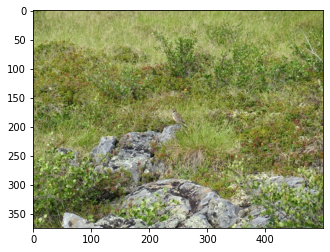

In [88]:
filterwarnings("ignore") 
tf_img = io.read_file(groups[cluster_no][13][0])
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)